# **Data Sceince(TC-2)  Experiment 6**  

#### Name - Sarvesh Karanjkar
#### PRN - 20210812002

## **Assignment 6**

**Perform Feature Engineering on the “TITANIC” dataset shared (Assuming that you have already done EDA for the data).**

Find below Feature Engineering (FE) Steps
1. Handling of Missing Values.
  * a. For Numerical Variables.
  * b. Categorical Variables.

2. Handling of Outliers at least for 1 variable.

Apart from the above FE requirement, you can add more processing of FE which you think can
be included.

For each step, please write your observation and at the end of the Experiment please provide a
precise conclusion.

In [ ]:
# Importiong all Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
titanic = pd.read_csv("/Kaggle_Titanic_Train_dataset.csv")
titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
titanic.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanic.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Checking for missing values
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* In our Titanic dataset we have 177 missing values in 'Age', 687 in 'Cabin' and 2 in 'Embarked' attribute.
* 'Cabin' has ~ 77% (687) missing values (i.e. "NaN").


In [ ]:
# a) Handling missing value for Numeric variable "Age".
median = titanic["Age"].median()
titanic["Age"].fillna(median, inplace=True)

In [ ]:
# b) Handling missing value for Categorical variable "Cabin" and "Embarked"
titanic[["Cabin"]] = titanic[["Cabin"]].fillna("Missing")
titanic[["Embarked"]] = titanic[["Embarked"]].fillna("Missing")

In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

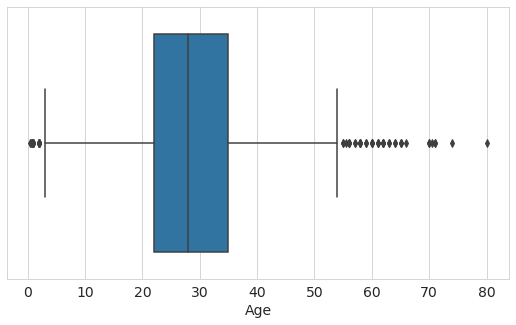

In [ ]:
# Handling Outlier in "Age" attribute
sns.boxplot(x=titanic["Age"])
plt.show()


In [ ]:

def detect_outliers_iqr(data):
 outliers = []
 data = sorted(data)
 q1 = np.percentile(data, 25)
 q3 = np.percentile(data, 75)
 # print(q1, q3)
 IQR = q3-q1
 lwr_bound = q1-(1.5*IQR)
 upr_bound = q3+(1.5*IQR)
 # print(lwr_bound, upr_bound)
 for i in data:
   if (i<lwr_bound or i>upr_bound):
     outliers.append(i)
     return outliers
sample_outliers_age = detect_outliers_iqr(titanic["Age"])
print("No. of outliers in Age from IQR method: ", len(sample_outliers_age))


No. of outliers in Age from IQR method:  1


* There are 66 outliers in Age attribute, which will affect our data.


In [ ]:
titanic["Age"].quantile([0.05,0.5,0.90,0.99])

0.05     6.0
0.50    28.0
0.90    47.0
0.99    65.0
Name: Age, dtype: float64

In [ ]:
Age = titanic["Age"]
fifth_percentile = np.percentile(Age, 5)
ninetith_percentile = np.percentile(Age, 90)
# print(fifth_percentile, ninetith_percentile)
titanic["Age"] = np.where(Age<fifth_percentile, fifth_percentile, Age)
titanic["Age"] = np.where(titanic["Age"]>ninetith_percentile, ninetith_percentile, titanic["Age"])
# titanic_df["Age"]


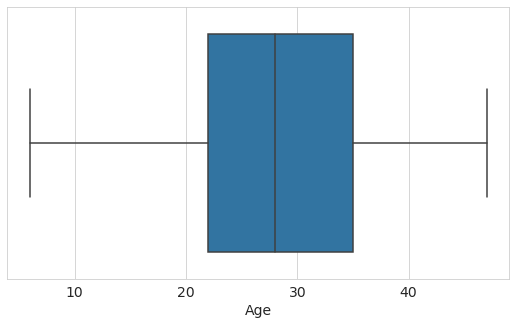

In [ ]:
sns.boxplot(x=titanic["Age"])
plt.show()


* Here, the data points that are lesser than the 5th percentile are replaced with the 5th percentile value and the data points that are
greater than the 90th percentile are replaced with 90th percentile value.
* So, we have successfully handled the outliers in Age attribute.


# **Conclusion**

* We have downloaded the dataset from Kaggle, and convert it into pandas dataframe.
* Handled some missing values in our dataset for both numerical and categorical variables.
* Finally we have handled the outliers in "Age" attribute.
